In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
data <- read.table("takehome_report.csv", sep = ",", header = T)
data[1:3,]

  wage educ exper tenure nonwhite female married numdep smsa northcen south
1 3.10   11     2      0        0      1       0      2    1        0     0
2 3.24   12    22      2        0      1       1      3    1        0     0
3 3.00   11     2      0        0      0       0      2    0        0     0
  west construc ndurman trcommpu trade services profserv profocc clerocc
1    1        0       0        0     0        0        0       0       0
2    1        0       0        0     0        1        0       0       0
3    1        0       0        0     1        0        0       0       0
  servocc    lwage expersq tenursq
1       0 1.131402       4       0
2       1 1.175573     484       4
3       0 1.098612       4       0


In [3]:
%%R
nonwhite_female <- data$female*data$nonwhite
educsq <- data$educ^2
fit <- lm(lwage~ educ+educsq+exper+expersq+tenure+tenursq+numdep+log(tenure+1)+
          as.factor(female)+as.factor(nonwhite)+as.factor(married)+
          as.factor(smsa)+as.factor(northcen)+as.factor(south)+as.factor(west)+
          as.factor(construc)+as.factor(ndurman)+as.factor(trcommpu)+as.factor(trade)+
          as.factor(services)+as.factor(profserv)+as.factor(profocc)+
          as.factor(clerocc)+as.factor(servocc)+nonwhite_female,data)
summary(fit)


Call:
lm(formula = lwage ~ educ + educsq + exper + expersq + tenure + 
    tenursq + numdep + log(tenure + 1) + as.factor(female) + 
    as.factor(nonwhite) + as.factor(married) + as.factor(smsa) + 
    as.factor(northcen) + as.factor(south) + as.factor(west) + 
    as.factor(construc) + as.factor(ndurman) + as.factor(trcommpu) + 
    as.factor(trade) + as.factor(services) + as.factor(profserv) + 
    as.factor(profocc) + as.factor(clerocc) + as.factor(servocc) + 
    nonwhite_female, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.69186 -0.21017 -0.00998  0.19911  1.26685 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           1.322e+00  1.877e-01   7.047 6.10e-12 ***
educ                 -3.683e-02  2.796e-02  -1.318 0.188255    
educsq                3.630e-03  1.169e-03   3.106 0.002007 ** 
exper                 2.751e-02  5.094e-03   5.401 1.02e-07 ***
expersq              -5.795e-04  1.086e-04  -5.335 1.45e-

In [4]:
%%R
library("MASS")
stepAIC(fit)

Start:  AIC=-1046.75
lwage ~ educ + educsq + exper + expersq + tenure + tenursq + 
    numdep + log(tenure + 1) + as.factor(female) + as.factor(nonwhite) + 
    as.factor(married) + as.factor(smsa) + as.factor(northcen) + 
    as.factor(south) + as.factor(west) + as.factor(construc) + 
    as.factor(ndurman) + as.factor(trcommpu) + as.factor(trade) + 
    as.factor(services) + as.factor(profserv) + as.factor(profocc) + 
    as.factor(clerocc) + as.factor(servocc) + nonwhite_female

                      Df Sum of Sq    RSS     AIC
- tenursq              1    0.0000 65.133 -1048.8
- tenure               1    0.0090 65.142 -1048.7
- as.factor(nonwhite)  1    0.0170 65.150 -1048.6
- as.factor(construc)  1    0.0423 65.175 -1048.4
- as.factor(clerocc)   1    0.0713 65.204 -1048.2
- nonwhite_female      1    0.1131 65.246 -1047.8
- as.factor(west)      1    0.1171 65.250 -1047.8
- log(tenure + 1)      1    0.1966 65.329 -1047.2
- as.factor(south)     1    0.2035 65.336 -1047.1
- as.factor(n

In [5]:
%%R
fit_AIC <- lm(formula = lwage ~ educ+educsq + exper + expersq + log(tenure + 
    1) + female + smsa +trade + services + 
    profocc + servocc, data = data)
summary(fit_AIC)


Call:
lm(formula = lwage ~ educ + educsq + exper + expersq + log(tenure + 
    1) + female + smsa + trade + services + profocc + servocc, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.60761 -0.21281 -0.01215  0.21500  1.26731 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      1.174e+00  1.720e-01   6.830 2.41e-11 ***
educ            -2.979e-02  2.738e-02  -1.088  0.27711    
educsq           3.399e-03  1.155e-03   2.943  0.00340 ** 
exper            2.732e-02  4.527e-03   6.034 3.06e-09 ***
expersq         -5.546e-04  9.673e-05  -5.733 1.69e-08 ***
log(tenure + 1)  9.106e-02  1.802e-02   5.053 6.05e-07 ***
female          -2.686e-01  3.306e-02  -8.123 3.41e-15 ***
smsa             1.662e-01  3.640e-02   4.567 6.20e-06 ***
trade           -2.273e-01  3.709e-02  -6.127 1.79e-09 ***
services        -2.352e-01  5.555e-02  -4.234 2.72e-05 ***
profocc          1.701e-01  4.124e-02   4.124 4.34e-05 ***
servocc         

In [6]:
%%R
data['educsq'] <- data$educ^2

fit <- lm(lwage~ educ+educsq+exper+expersq+tenure+tenursq+numdep+log(tenure+1)+
          (female)+(nonwhite)+(married)+
          (smsa)+(northcen)+(south)+(west)+
          (construc)+(ndurman)+(trcommpu)+(trade)+
          (services)+(profserv)+(profocc)+
          (clerocc)+(servocc),data)
#summary(fit)
data['educsq'] <- (data$educ)^2

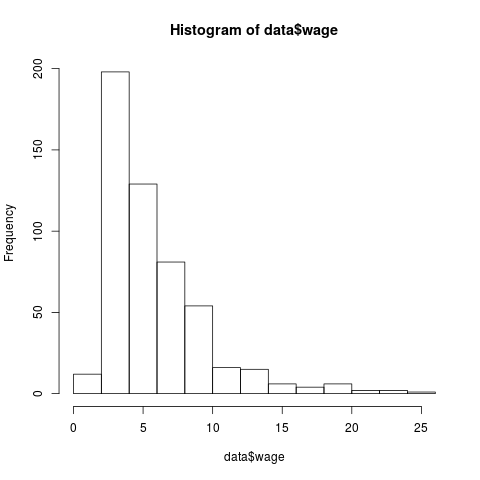

In [7]:
%%R
hist(data$wage)

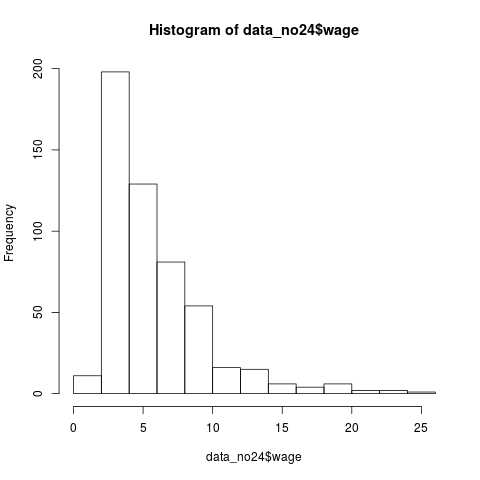

In [8]:
%%R
data_no24 <-data[-24,]
hist(data_no24$wage)

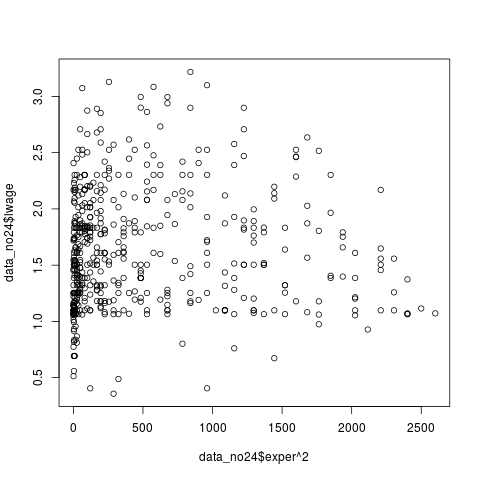

In [9]:
%%R
plot(data_no24$exper^2, data_no24$lwage)

In [10]:
%%R
cat('length', length(data_no24[,1]),'\n')
samples <- sample(length(data_no24[,1]),50)
data_test <- data_no24[samples,]
data_train <- data_no24[-samples,]



length 525 


In [11]:
%%R
fit_train <- lm(formula = lwage ~ educ+educsq + exper + expersq + log(tenure + 
    1) + female + smsa +trade + services + 
    profocc + servocc, data = data_train)
#fit_train <- lm(formula = lwage ~  log(tenure + 
#    1) + female + smsa +trade + services + 
#    profocc + servocc, data = data_train)
summary(fit_train)


Call:
lm(formula = lwage ~ educ + educsq + exper + expersq + log(tenure + 
    1) + female + smsa + trade + services + profocc + servocc, 
    data = data_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.11329 -0.21892 -0.01407  0.20665  1.11891 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      1.159e+00  1.758e-01   6.594 1.17e-10 ***
educ            -2.827e-02  2.778e-02  -1.018 0.309421    
educsq           3.380e-03  1.170e-03   2.889 0.004046 ** 
exper            2.634e-02  4.633e-03   5.686 2.31e-08 ***
expersq         -5.378e-04  9.855e-05  -5.458 7.87e-08 ***
log(tenure + 1)  8.888e-02  1.888e-02   4.708 3.31e-06 ***
female          -2.428e-01  3.423e-02  -7.093 4.94e-12 ***
smsa             1.738e-01  3.784e-02   4.592 5.66e-06 ***
trade           -2.354e-01  3.831e-02  -6.144 1.74e-09 ***
services        -2.046e-01  5.899e-02  -3.468 0.000573 ***
profocc          1.466e-01  4.307e-02   3.404 0.000723 ***
servocc   

In [12]:
%%R
cat('MSE: ',sum(fit_train$res^2)/length(data_train[,1]),'\n')
MSPR <- sum((data_test$lwage - predict(fit_train, data_test))^2)/length(data_test[,1])
MSPE <- sum((data_test$lwage - mean(data_test$lwage))^2)/length(data_test[,1])
cat('MSPR: ', MSPR, '\n')
cat('MSPE: ', MSPE, '\n')
predict(fit_train, data_test, interval="predict") 

MSE:  0.1234356 
MSPR:  0.1257757 
MSPE:  0.3370042 
          fit       lwr      upr
441 2.4346157 1.7232837 3.145948
173 1.7569850 1.0525580 2.461412
399 1.8862673 1.1795834 2.592951
500 1.9029275 1.1994788 2.606376
462 1.4864903 0.7720563 2.200924
429 1.5000333 0.7957572 2.204309
400 1.8859385 1.1819447 2.589932
292 1.2280942 0.5212269 1.934962
495 1.5585866 0.8527462 2.264427
162 1.0823009 0.3719496 1.792652
330 1.3208791 0.6106906 2.031068
248 1.1572783 0.4448089 1.869748
442 1.5008873 0.7965797 2.205195
471 1.6827804 0.9778810 2.387680
66  2.3499230 1.6453274 3.054519
117 1.3012132 0.5954017 2.007025
163 1.9537364 1.2411701 2.666303
53  1.6782906 0.9730929 2.383488
374 1.5354413 0.8311981 2.239685
340 1.4964722 0.7906200 2.202324
14  1.9034214 1.1996871 2.607156
219 1.6637716 0.9550953 2.372448
64  1.3968692 0.6919513 2.101787
526 1.4442586 0.7377546 2.150763
364 1.5292484 0.8229707 2.235526
31  2.2267422 1.5230854 2.930399
464 1.6556532 0.9487145 2.362592
191 1.3947050 0.6886644

In [13]:
%%R
fit_test <- lm(formula = lwage ~ educ + educsq + exper + expersq + log(tenure + 
    1) + female + smsa +trade + services + 
    profocc + servocc, data = data_test)
fit_test$coef - fit_train$coef

    (Intercept)            educ          educsq           exper         expersq 
   2.589719e-01   -1.057851e-02    9.999113e-05   -1.679909e-02    3.718016e-04 
log(tenure + 1)          female            smsa           trade        services 
   7.018661e-02   -2.825824e-01   -4.596489e-02    5.185513e-02   -1.924903e-01 
        profocc         servocc 
   2.644255e-01    1.472131e-01 


In [29]:
%%R
wage_prediction <- data.frame( data_test$wage, exp(predict(fit_train, data_test)), 
                              abs(data_test$wage - exp(predict(fit_train, data_test))),
                             data_test$lwage , predict(fit_train, data_test),
                             abs(data_test$lwage - (predict(fit_train, data_test)))) #-predict(fit_train, data_test)

colnames(wage_prediction) <- c('real','pred','diff', 'lwage', 'lpred','ldiff')
wage_prediction[c('real','pred','diff')]

     real      pred         diff
441 11.25 11.411433  0.161432723
173  5.25  5.794939  0.544939457
399 10.92  6.594707  4.325293232
500  7.25  6.705496  0.544504156
462  3.75  4.421550  0.671550068
429  3.35  4.481838  1.131838136
400  7.50  6.592538  0.907461638
292  3.18  3.414716  0.234715590
495  3.30  4.752100  1.452099996
162  3.13  2.951463  0.178537342
330  3.35  3.746714  0.396713533
248  1.96  3.181263  1.221262944
442  3.50  4.485668  0.985667656
471  5.00  5.380495  0.380495270
66  19.98 10.484762  9.495237810
117  3.50  3.673751  0.173750795
163  8.00  7.054999  0.945001275
53   5.00  5.356392  0.356392007
374  3.13  4.643374  1.513374243
340  4.50  4.465906  0.034093660
14   5.50  6.708809  1.208808527
219  3.25  5.279184  2.029184233
64   3.71  4.042524  0.332523923
526  3.50  4.238708  0.738708308
364  3.35  4.614707  1.264707039
31  13.00  9.269618  3.730381902
464  3.50  5.236499  1.736499251
191  3.50  4.033785  0.533784531
301  6.08  5.515432  0.564568360
203 10.00 

In [15]:
%%R
for (i in seq(0.4,0.6,by=0.01)){
    cat(i,sum(wage_prediction$ldiff < i)/length(wage_prediction$diff),'\n')
        #sum(wage_prediction$diff < exp(i))/length(wage_prediction$diff),'\n')
    }

0.4 0.8 
0.41 0.82 
0.42 0.82 
0.43 0.82 
0.44 0.82 
0.45 0.82 
0.46 0.82 
0.47 0.82 
0.48 0.82 
0.49 0.88 
0.5 0.88 
0.51 0.9 
0.52 0.9 
0.53 0.9 
0.54 0.9 
0.55 0.92 
0.56 0.92 
0.57 0.92 
0.58 0.92 
0.59 0.92 
0.6 0.92 


In [16]:
%%R
model <- c('lwage', 'educ','educsq','exper','expersq','tenure','female', 'smsa', 'trade', 'services','profocc', 'servocc')
fit_AIC <- lm(formula = lwage ~ ., data = data[,model])
summary(fit_AIC)


Call:
lm(formula = lwage ~ ., data = data[, model])

Residuals:
     Min       1Q   Median       3Q      Max 
-1.58499 -0.20715 -0.02643  0.20975  1.30206 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.187e+00  1.724e-01   6.882 1.72e-11 ***
educ        -2.758e-02  2.745e-02  -1.005  0.31557    
educsq       3.372e-03  1.158e-03   2.911  0.00376 ** 
exper        2.957e-02  4.442e-03   6.656 7.23e-11 ***
expersq     -6.021e-04  9.607e-05  -6.268 7.76e-10 ***
tenure       1.245e-02  2.632e-03   4.732 2.88e-06 ***
female      -2.644e-01  3.336e-02  -7.924 1.44e-14 ***
smsa         1.607e-01  3.656e-02   4.396 1.34e-05 ***
trade       -2.339e-01  3.707e-02  -6.311 5.99e-10 ***
services    -2.492e-01  5.544e-02  -4.494 8.62e-06 ***
profocc      1.775e-01  4.131e-02   4.296 2.08e-05 ***
servocc     -1.341e-01  4.941e-02  -2.715  0.00685 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3632 on 514 degree

In [19]:
%%R
pred <- predict(fit_train, data_test, interval="predict") 
df <- data.frame(pred, data_test$lwage)
df

          fit       lwr      upr data_test.lwage
441 2.4346157 1.7232837 3.145948       2.4203680
173 1.7569850 1.0525580 2.461412       1.6582280
399 1.8862673 1.1795834 2.592951       2.3905960
500 1.9029275 1.1994788 2.606376       1.9810010
462 1.4864903 0.7720563 2.200924       1.3217560
429 1.5000333 0.7957572 2.204309       1.2089600
400 1.8859385 1.1819447 2.589932       2.0149030
292 1.2280942 0.5212269 1.934962       1.1568810
495 1.5585866 0.8527462 2.264427       1.1939220
162 1.0823009 0.3719496 1.792652       1.1410330
330 1.3208791 0.6106906 2.031068       1.2089600
248 1.1572783 0.4448089 1.869748       0.6729445
442 1.5008873 0.7965797 2.205195       1.2527630
471 1.6827804 0.9778810 2.387680       1.6094380
66  2.3499230 1.6453274 3.054519       2.9947320
117 1.3012132 0.5954017 2.007025       1.2527630
163 1.9537364 1.2411701 2.666303       2.0794420
53  1.6782906 0.9730929 2.383488       1.6094380
374 1.5354413 0.8311981 2.239685       1.1410330
340 1.4964722 0.7906

In [25]:
%%R
df$data_test.lwage < df$upr

 [1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[25]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[37]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
[49]  TRUE  TRUE


In [26]:
1/25

0.04